# Perbandingan Efektivitas Algoritma XGBoost dan MLP pada Klasifikasi Penyakit Diabetes

In [269]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [270]:
# Load dataset
df = pd.read_csv("../data/Dataset of Diabetes .csv")
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


### Ringkasan Statistik Awal

In [271]:
# Informasi umum dataset
df.info()

# Statistik deskriptif
df.describe(include='all')
# Tujuan: melihat tipe data, missing values, distribusi nilai minimum, maksimum, rata-rata, dll.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,1000.000000,1.000000e+03,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,NaN,NaN,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840
mean,340.500000,2.705514e+05,NaN,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020,NaN
std,240.397673,3.380758e+06,NaN,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388,NaN
min,1.000000,1.230000e+02,NaN,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000,NaN
25%,125.750000,2.406375e+04,NaN,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000,NaN
50%,300.500000,3.439550e+04,NaN,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000,NaN
75%,550.250000,4.538425e+04,NaN,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000,NaN


### Cek Keseimbangan Kelas Target

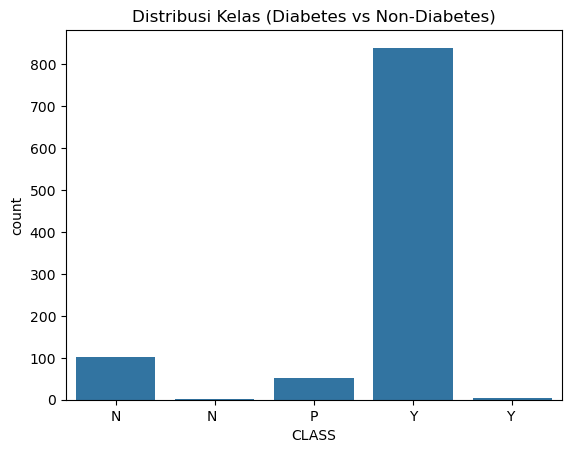

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='CLASS', data=df)
plt.title("Distribusi Kelas (Diabetes vs Non-Diabetes)")
plt.show()

#Tujuan: Apakah data target CLASS (N vs P) seimbang? Jika tidak, bisa pertimbangkan teknik resampling (SMOTE/ROS).


### Distribusi Fitur Numerik

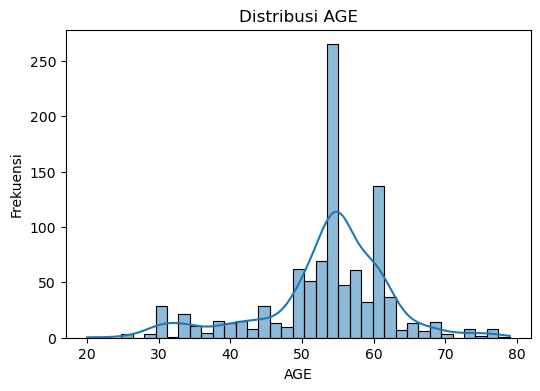

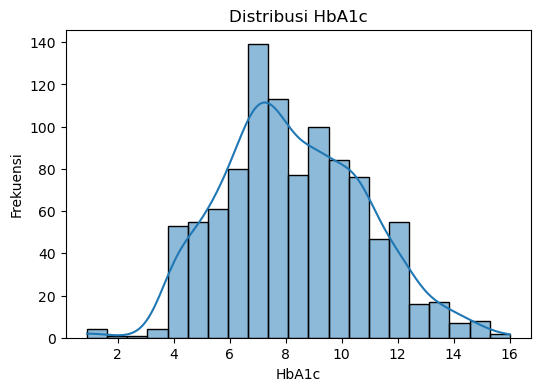

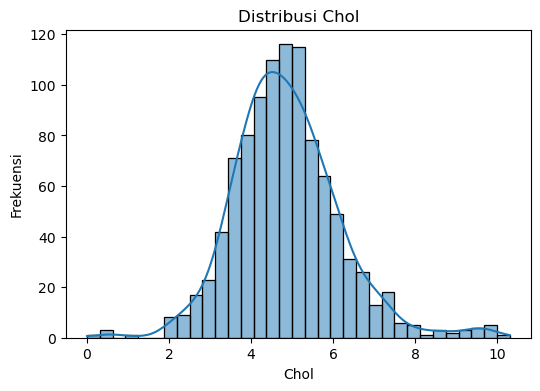

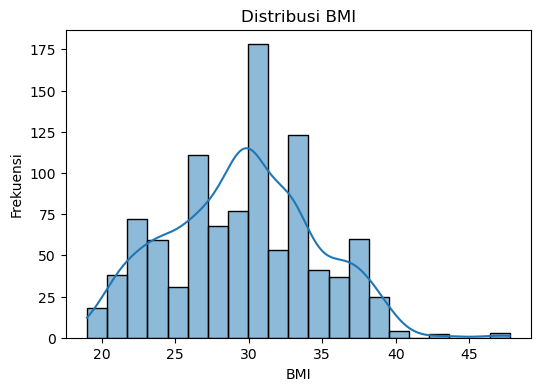

In [273]:
# Contoh: distribusi fitur penting
features = ['AGE', 'HbA1c', 'Chol', 'BMI']

for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()
# Tujuan: Memahami distribusi fitur penting dalam dataset. Apakah ada outlier atau distribusi yang tidak normal?
# Mengetahui apakah fitur berdistribusi normal, skewed, atau memiliki outlier.




### Korelasi Antar Variabel

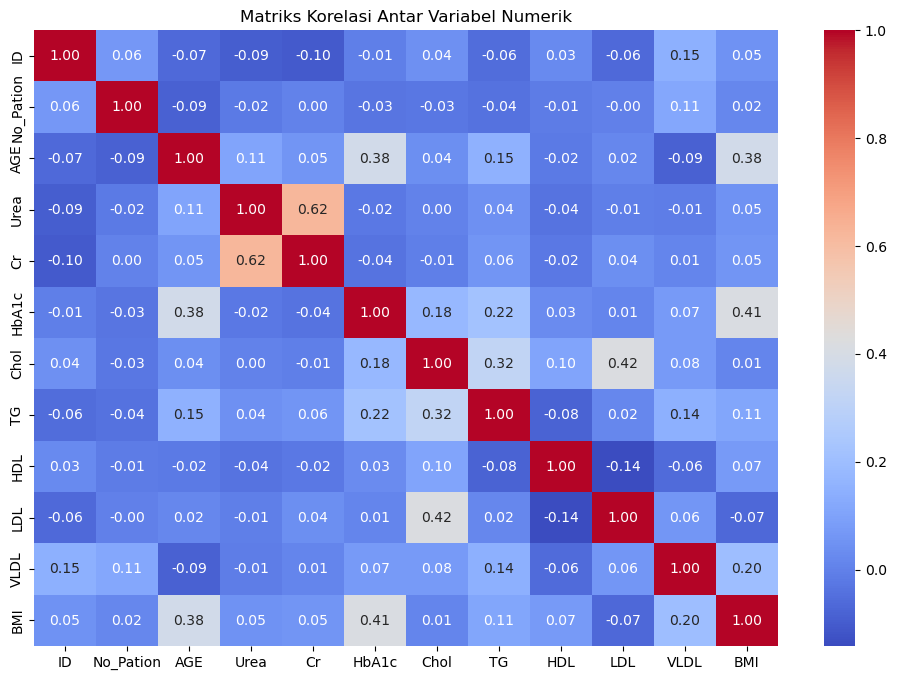

In [274]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Variabel Numerik')
plt.show()
# 📌 Tujuan: Mengetahui fitur-fitur yang sangat berkorelasi (positif atau negatif). Bisa jadi petunjuk untuk feature selection atau multikolinearitas.

### Korelasi Fitur terhadap Target

In [275]:
# Salin dataframe dan encode kolom CLASS
df_corr = df.copy()
df_corr['CLASS'] = df_corr['CLASS'].map({'N': 0, 'P': 1})

# Drop kolom non-numerik lainnya (misalnya: Gender)
df_corr = df_corr.drop(columns=['Gender'])  # bisa ditambah kolom string lainnya jika ada

# Hitung korelasi terhadap CLASS
target_corr = df_corr.corr(numeric_only=True)['CLASS'].sort_values(ascending=False)
print("Korelasi Fitur terhadap Target (CLASS):")
print(target_corr)

# Tujuan: Mengetahui fitur mana yang paling berkaitan dengan diabetes.


Korelasi Fitur terhadap Target (CLASS):
CLASS        1.000000
HbA1c        0.674914
BMI          0.360858
TG           0.224478
Chol         0.122636
ID           0.051854
Cr           0.048171
VLDL         0.014595
Urea        -0.031320
AGE         -0.054111
No_Pation   -0.059678
LDL         -0.065415
HDL         -0.103024
Name: CLASS, dtype: float64


### Visualisasi Pairplot 

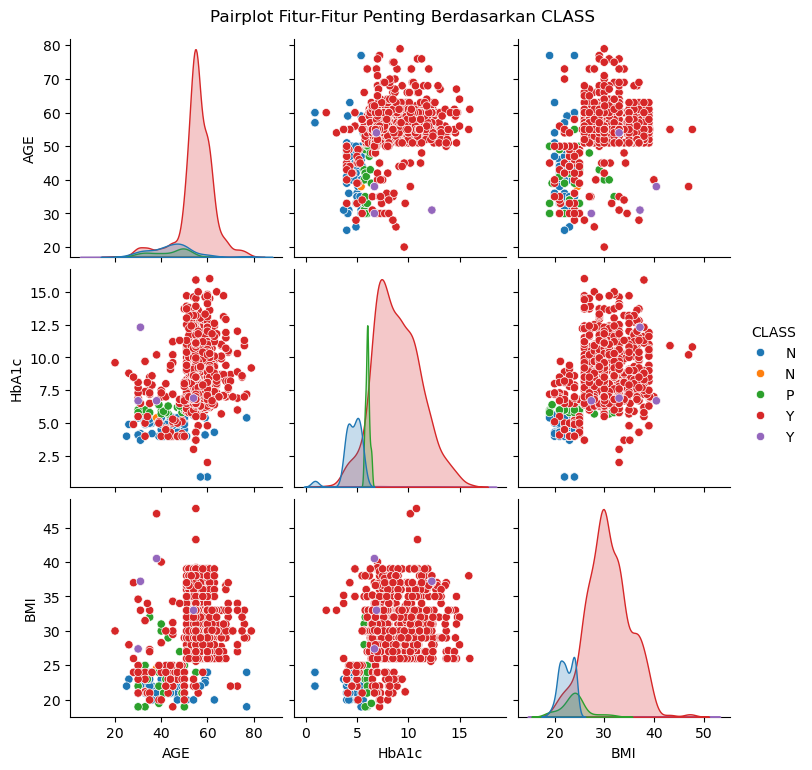

In [276]:
sns.pairplot(df, hue='CLASS', vars=['AGE', 'HbA1c', 'BMI'])
plt.suptitle("Pairplot Fitur-Fitur Penting Berdasarkan CLASS", y=1.02)
plt.show()
# Tujuan: Visualisasi hubungan antar fitur penting dengan target CLASS. Apakah ada pola yang jelas antara fitur dan kelas?

pairplot tersebut akan digenerate sebelum encode label CLASS dengan LabelEncoder menjadi N P Q R.

## PENGEMBANGAN MODEL MACHINE LEARNING

In [277]:
print(y.value_counts())


CLASS
2    840
0    102
1     53
3      4
Name: count, dtype: int64


Pembuangan kelas dengan jumlah 2 agar membuat class yang hanya berisikan / bernilai 1 (dapat membuat error)

Kelas dengan jumlah hanya 1 data harus dibuang karena stratify=y tidak bisa membagi satu data menjadi dua subset (train dan test).



In [278]:
# Buang kelas dengan jumlah < 2
y_counts = y.value_counts()
valid_classes = y_counts[y_counts >= 2].index
mask = y.isin(valid_classes)

X = X[mask]
y = y[mask]
X_scaled = scaler.fit_transform(X)


#### Pengecekan Model Column yang tersisa

In [279]:
print(df_model.columns.tolist())


['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']


#### Sudah tidak ada colum id dan no_pation maka kita harus meng ingore agar tidak terjadi error

In [280]:
# Jika yakin sudah tidak ada kolom tersebut, cukup lanjutkan tanpa drop
# atau bisa juga pakai drop dengan errors='ignore' untuk berjaga-jaga:
df_model.drop(columns=['ID', 'No_Pation'], inplace=True, errors='ignore')


### Preprocessing (Encode & Scaling)

In [281]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Salin data
df_model = df.copy()

# Hapus label dengan jumlah terlalu sedikit
label_counts = df_model['CLASS'].value_counts()
valid_labels = label_counts[label_counts >= 2].index
df_model = df_model[df_model['CLASS'].isin(valid_labels)].copy()

# Encode CLASS (multiclass)
le_class = LabelEncoder()
df_model['CLASS'] = le_class.fit_transform(df_model['CLASS'])

# Encode Gender
df_model['Gender'] = LabelEncoder().fit_transform(df_model['Gender'])

# Drop kolom lain jika masih ada
df_model.drop(columns=['ID', 'No_Pation'], inplace=True, errors='ignore')

# Pisahkan fitur dan target
X = df_model.drop(columns=['CLASS'])
y = df_model['CLASS']

# Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)


### Preprocessing Data untuk Klasifikasi Multiclass

Dokumen ini menjelaskan tahapan preprocessing yang dilakukan dalam proyek klasifikasi penyakit diabetes menggunakan algoritma seperti XGBoost dan MLPClassifier. Dataset awal mengandung label `CLASS` dan beberapa fitur medis seperti `AGE`, `HbA1c`, dan `BMI`.
### 1. Salin Data
```python
df_model = df.copy()
```
Menyalin dataframe asli untuk menjaga data mentah tetap utuh.


### 2. Buang Kelas yang Terlalu Sedikit
```python
label_counts = df_model['CLASS'].value_counts()
valid_labels = label_counts[label_counts >= 2].index
df_model = df_model[df_model['CLASS'].isin(valid_labels)].copy()
```
Kelas dengan jumlah <2 dibuang karena `train_test_split(stratify=...)` membutuhkan minimal 2 sampel per kelas.


### 3. Encode CLASS (Multiclass)
```python
from sklearn.preprocessing import LabelEncoder
le_class = LabelEncoder()
df_model['CLASS'] = le_class.fit_transform(df_model['CLASS'])
```
Label `CLASS` diubah dari string menjadi angka seperti `0`, `1`, `2`, `3`.


### 4. Encode Gender
```python
df_model['Gender'] = LabelEncoder().fit_transform(df_model['Gender'])
```
Kolom `Gender` dikonversi ke angka: `'F'` → 0, `'M'` → 1.


### 5. Hapus Kolom Tidak Relevan
```python
df_model.drop(columns=['ID', 'No_Pation'], inplace=True, errors='ignore')
```
Kolom identitas dihapus karena tidak berkontribusi dalam prediksi.


### 6. Pisahkan Fitur dan Target
```python
X = df_model.drop(columns=['CLASS'])
y = df_model['CLASS']
```
- `X`: Fitur yang digunakan untuk pelatihan
- `y`: Label target yang ingin diprediksi


### 7. Normalisasi Fitur
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```
Fitur dinormalisasi agar berada dalam skala yang sama, menghindari dominasi fitur berskala besar.


### 8. Split Data: Train & Test
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42)
```
- Data dibagi 80% untuk pelatihan, 20% untuk pengujian
- `stratify=y` menjaga proporsi label tetap seimbang
- `random_state=42` memastikan hasil dapat direproduksi



### CEK CLASS

In [256]:
print("y_train:", sorted(y_train.unique()))
print("y_test :", sorted(y_test.unique()))


y_train: [0, 1, 2, 3]
y_test : [0, 1, 2, 3]


###  Model 1: XGBoost Classifier

In [257]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]


Membangun model klasifikasi berbasis ensemble gradient boosting, yang sangat kuat dalam mendeteksi pola kompleks dan cocok untuk data tabular, bahkan saat ada missing value atau outlier.

dengan pemahaman kode yang saya pahami : 
- XGBClassifier(...) : ntuk membuat model XGBoost untuk klasfikasi
- Use_label itu agar selalu up to date
- eval_metric = penggunaan log loss untuk evaluasi multiclass
- randomstate = membuat hasil konsisten
- fit x dan y = pelatihan nya
- predik = predik
- predic proba = penghasilkan probabilitas yang diklasifikan menjadi kelas 1

* Log Loss mengukur seberapa jauh prediksi probabilitas dari kenyataan.
Semakin kecil nilai log loss, semakin baik prediksi model.

### Model 2: MLP Classifier

In [258]:

# MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)
mlp_preds = mlp_model.predict(X_test)
mlp_probs = mlp_model.predict_proba(X_test)[:, 1]

Membangun model klasifikasi berbasis neural network yang mampu mempelajari hubungan non-linear antar fitur, cocok untuk data numerik yang telah dinormalisasi (StandardScaler sangat penting di sini).

Dengan pemahaman kode model  :
- mlpclasifika = klasfikasi
- hidden layer = pembuatan hidden layer (100 neuron)
- max_iter =  melakukan iterasi training hingga 300 x
- random state = membuat hasil konsisten
- fit x & y = pelatihan
- predic dan predicproba = sama aja penjelasannya

 ### Evaluasi Model (Akurasi, Laporan Klasifikasi)

In [259]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluasi XGBoost
print("XGBoost Performance:")
print("Akurasi:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

# Evaluasi MLP
print("\nMLPClassifier Performance:")
print("Akurasi:", accuracy_score(y_test, mlp_preds))
print(classification_report(y_test, mlp_preds))


XGBoost Performance:
Akurasi: 0.975
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       1.00      0.91      0.95        11
           2       0.98      0.99      0.99       168
           3       0.00      0.00      0.00         1

    accuracy                           0.97       200
   macro avg       0.75      0.71      0.73       200
weighted avg       0.98      0.97      0.98       200


MLPClassifier Performance:
Akurasi: 0.945
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        20
           1       0.67      0.55      0.60        11
           2       0.98      0.99      0.98       168
           3       0.00      0.00      0.00         1

    accuracy                           0.94       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.94      0.94      0.94       200



#### PENJELASAN HASIL
 Akurasi = proporsi data yang diprediksi benar.
Semakin tinggi akurasi, semakin baik model secara umum.
Tapi akurasi saja tidak cukup, terutama untuk data dengan distribusi kelas tidak seimbang.

#### MAKA HASIL DARI xgboost yang didapatkan :
Kelas 0: precision 1.00, recall 0.95 → Sangat bagus
Kelas 1: precision 1.00, recall 0.91 → Masih bagus, recall agak turun
Kelas 2: precision 0.98, recall 0.99 → Sangat kuat
Kelas 3: precision 0.00, recall 0.00 → Gagal total (mungkin data hanya 1 dan tak terdeteksi)

dengan : 
Macro avg (rata-rata antar kelas) = 0.73 F1
Weighted avg (berat berdasarkan jumlah data) = 0.98 F1

XGBoost sangat kuat di kelas dominan (kelas 2), tapi gagal total di kelas langka (kelas 3).

#### maka hasil dari MODEL MLPClassifier
Kelas 0: precision 0.81, recall 0.85 → Lumayan
Kelas 1: precision 0.67, recall 0.55 → Lemah
Kelas 2: precision 0.98, recall 0.99 → Sangat bagus
Kelas 3: precision 0.00, recall 0.00 → Gagal total

dengan : 
Macro avg = 0.60 F1
Weighted avg = 0.94 F1

📌 MLP cukup bagus secara umum, tapi jauh lebih lemah dari XGBoost, terutama di kelas 1.

## Visualisasi Hasil Evaluasi

### Visualisasi Confusion Matrix

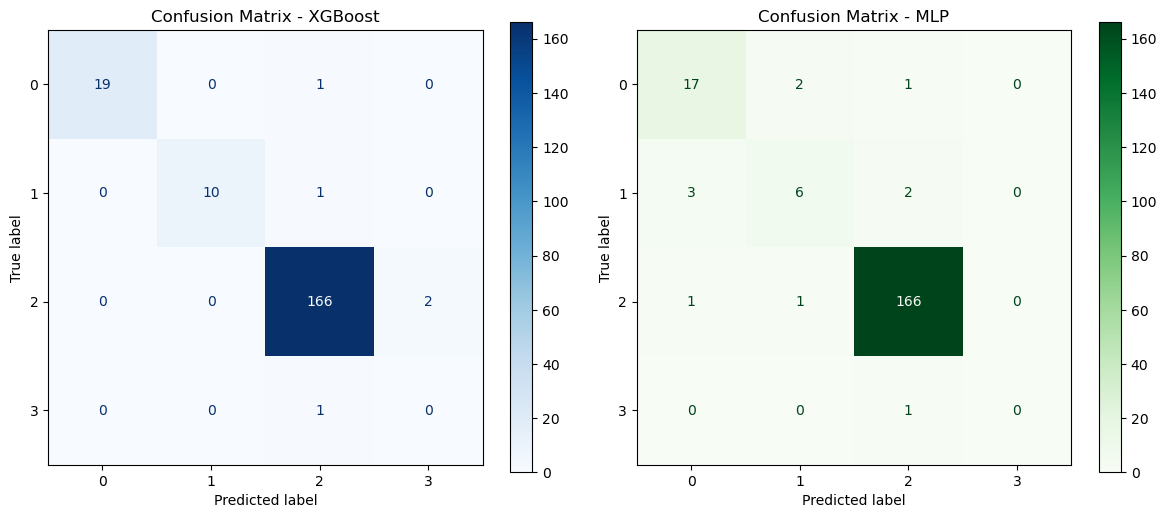

In [260]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(
    y_test, xgb_preds, ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - XGBoost")

ConfusionMatrixDisplay.from_predictions(
    y_test, mlp_preds, ax=axes[1], cmap='Greens')
axes[1].set_title("Confusion Matrix - MLP")

plt.tight_layout()
plt.show()


### Perbandingan Akurasi dalam Bar Chart

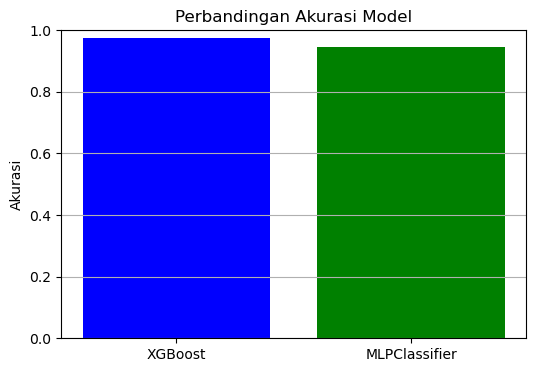

In [261]:
import numpy as np

# Akurasi masing-masing model
acc_xgb = accuracy_score(y_test, xgb_preds)
acc_mlp = accuracy_score(y_test, mlp_preds)

# Visualisasi
plt.figure(figsize=(6, 4))
plt.bar(['XGBoost', 'MLPClassifier'], [acc_xgb, acc_mlp], color=['blue', 'green'])
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


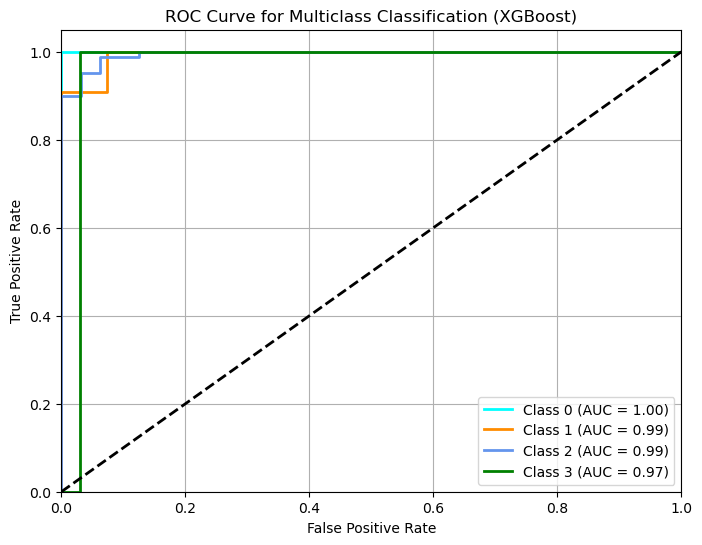

In [262]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Binarisasi label y_test
classes = np.unique(y_test)
n_classes = len(classes)

y_test_binarized = label_binarize(y_test, classes=classes)
xgb_probs = xgb_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], xgb_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification (XGBoost)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### SET RANDOM SEET KEMBALI

In [263]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)


#### Memastikan Random State konsisten

In [264]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)


### Penyimpanan Model Ke .PKL

In [265]:
import joblib

# Simpan model XGBoost dan MLP
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')


['mlp_model.pkl']

### Simpan Evaluasi ke CSV

In [266]:
from sklearn.metrics import accuracy_score

acc_xgb = accuracy_score(y_test, xgb_preds)
acc_mlp = accuracy_score(y_test, mlp_preds)


In [ ]:
# Simpan hasil evaluasi ke file CSV
evaluation_df = pd.DataFrame({
    'Model': ['XGBoost', 'MLPClassifier'],
    'Accuracy': [acc_xgb, acc_mlp]
})

evaluation_df.to_csv("model_evaluation.csv", index=False)
print("Hasil evaluasi disimpan ke model_evaluation.csv")


Hasil evaluasi disimpan ke model_evaluation.csv


#### nilai keluaran tanpa disimpan

In [282]:
# Save models
joblib.dump(xgb_model, 'xgb_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')

# Save evaluation
evaluation_results = pd.DataFrame({
    'Model': ['XGBoost', 'MLPClassifier'],
    'Accuracy': [acc_xgb, acc_mlp]
})
evaluation_results.to_csv('model_evaluation.csv', index=False)
evaluation_results

,Model,Accuracy
0,XGBoost,0.975
1,MLPClassifier,0.945
